# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

In this assigment we will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition the speaker ID and the gender of the speaker are given for each phoneme.

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

(a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

<IPython.core.display.Javascript object>


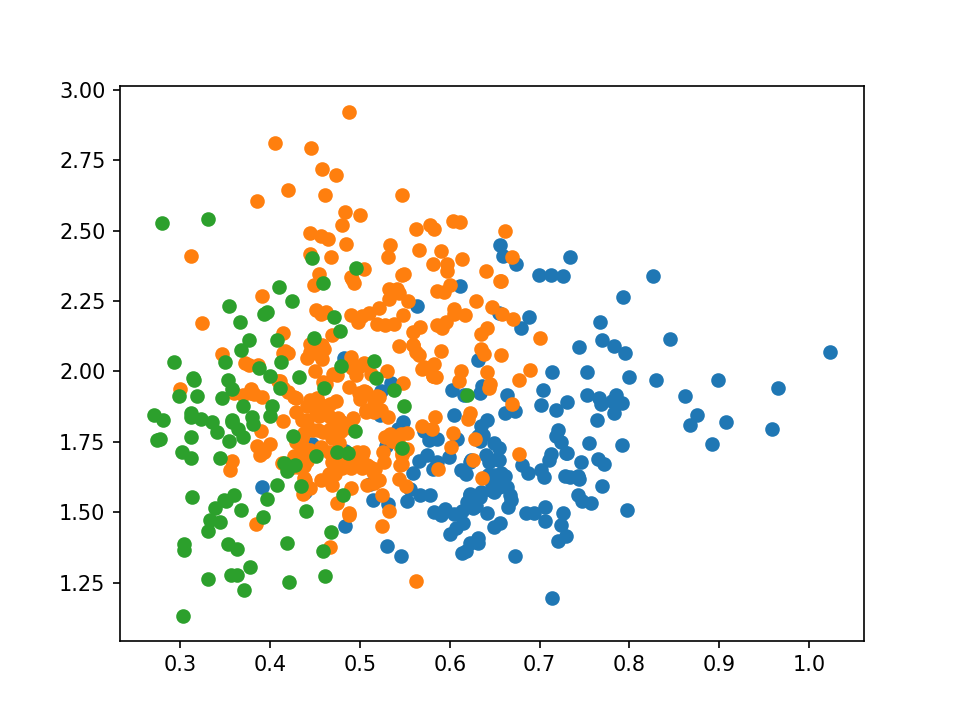

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

#aesMatrix=pd.DataFrame(np.outer(aes, aes), aes.index, aes.index)
# Plotting here
fig,ax=plt.subplots()
ax.scatter(aes["F1"],aes["F2"]) #blå
ax.scatter(eys["F1"],eys["F2"]) #oransje
ax.scatter(uxs["F1"],uxs["F2"]) #grønn
#the classes that will most diffucult to classify will be eys and the uxs because of too much overlapping as wee can see
#at the scatter plots. 


(b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

In [53]:
#starting with aes
import scipy
from scipy import stats
list_of_aes_F1=aes["F1"].to_numpy()
list_of_aes_F2=aes["F2"].to_numpy()
muEst_aes=[np.average(list_of_aes_F1),np.average(list_of_aes_F2)]
print("for aes")
print("mean", muEst_aes)
m=np.array([list_of_aes_F1,list_of_aes_F2])
CovA=np.cov(m)
print("kovariansmatrise",CovA)
pA=len(aes)/(len(aes)+len(eys)+len(uxs)) #prior
print("pA", pA)
aesT = test[test["Phoneme"] == 'ae']
list_of_aes_F1_Test=aesT["F1"].to_numpy()
list_of_aes_F2_Test=aesT["F2"].to_numpy()
matrixT=np.array([list_of_aes_F1_Test,list_of_aes_F2_Test]).transpose() #[["F1","F2"],..] 
mvn=scipy.stats.multivariate_normal(muEst_aes,CovA)
print("likelihood", mvn.pdf(matrixT[0][0:]))
print("matrix",matrixT[0][0:])
posterior=mvn.pdf(matrixT[0][0:])*pA
print("posterior", posterior)


                                           
#now for eys
print("for eys")
list_of_eys_F1=eys["F1"].to_numpy()
list_of_eys_F2=eys["F2"].to_numpy()
muEst_eys=[np.average(list_of_eys_F1),np.average(list_of_eys_F2)]
print("mean", muEst_eys)
m_eys=np.array([list_of_eys_F1,list_of_eys_F2])
Cov_eys=np.cov(m_eys)
print("kovariansmatrise",Cov_eys)
p_eys=len(eys)/(len(aes)+len(eys)+len(uxs)) #prior
print("pA", p_eys)
eysT = test[test["Phoneme"] == 'ey']
list_of_eys_F1_Test=eysT["F1"].to_numpy()
list_of_eys_F2_Test=eysT["F2"].to_numpy()
matrix_trans_eys=np.array([list_of_eys_F1_Test,list_of_eys_F2_Test]).transpose() #[["F1","F2"],..] 
mvn_eys=scipy.stats.multivariate_normal(muEst_eys,Cov_eys)
print("likelihood", mvn_eys.pdf(matrix_trans_eys[0][0:]))
print("matrix",matrix_trans_eys[0][0:])
post_eys=mvn_eys.pdf(matrix_trans_eys[0][0:])*p_eys
print("posterior", post_eys)


#finally for uxs
print("for uxs")
list_of_uxs_F1=uxs["F1"].to_numpy()
list_of_uxs_F2=uxs["F2"].to_numpy()
muEst_uxs=[np.average(list_of_uxs_F1),np.average(list_of_uxs_F2)]
print("mean", muEst_uxs)
m_uxs=np.array([list_of_uxs_F1,list_of_uxs_F2])
Cov_uxs=np.cov(m_uxs)
print("kovariansmatrise",Cov_uxs)
p_uxs=len(uxs)/(len(aes)+len(eys)+len(uxs)) #prior
print("pA", p_uxs)
uxsT = test[test["Phoneme"] == 'ux']
list_of_uxs_F1_Test=uxsT["F1"].to_numpy()
list_of_uxs_F2_Test=uxsT["F2"].to_numpy()
matrix_trans_uxs=np.array([list_of_uxs_F1_Test,list_of_uxs_F2_Test]).transpose() #[["F1","F2"],..] 
mvn_uxs=scipy.stats.multivariate_normal(muEst_uxs,Cov_uxs)
print("likelihood", mvn_uxs.pdf(matrix_trans_uxs[0][0:]))
print("matrix",matrix_trans_uxs[0][0:])
post_uxs=mvn_uxs.pdf(matrix_trans_uxs[0][0:])*p_uxs
print("posterior", post_uxs)



#now use bayesian decision rule to make confusion matrix 
confusion_Mat=np.zeros((3,3))
#for aes
for i in range(len(aesT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[0][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[0][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[0][2]+=1
#for eys 
for i in range(len(eysT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[1][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[1][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[1][2]+=1
#for uxs 
for i in range(len(uxsT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[2][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[2][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[2][2]+=1
        
print(confusion_Mat)

print(len(uxsT)+len(eysT)+len(aesT))


#normaldisturbution function
def normald(x,mu,Cov):
    pdf=scipy.stats.multivariate_normal.pdf(x,mu,Cov)
    return pdf





for aes
mean [0.6698604040063185, 1.7423804026807663]
kovariansmatrise [[0.01060842 0.00759043]
 [0.00759043 0.06317165]]
pA 0.31115107913669066
likelihood 2.308934062510482
matrix [0.62684858 2.04056787]
posterior 0.7184273252055996
for eys
mean [0.5045519111013244, 1.9784005560217814]
kovariansmatrise [[0.00602243 0.00386976]
 [0.00386976 0.08785495]]
pA 0.5089928057553957
likelihood 4.004630329195976
matrix [0.49687958 2.28166199]
posterior 2.0383280272706137
for uxs
mean [0.3873842254281044, 1.7894474411010741]
kovariansmatrise [[0.00493896 0.00303423]
 [0.00303423 0.09479051]]
pA 0.17985611510791366
likelihood 2.5586779501752983
matrix [0.48667097 1.96281028]
posterior 0.460193875930809
[[80. 24.  1.]
 [13. 97.  4.]
 [ 1. 28. 23.]]
271


*Try:* To visualize the classes models and the classifier created in (b), you can:

- Plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$.
- Plot the decision regions for the Bayesian classifier.

(c) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (b). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

In [100]:
#starting with aes
import scipy
from scipy import stats
list_of_aes_F3=aes["F3"].to_numpy()
list_of_aes_F4=aes["F4"].to_numpy()
muEst_aes=[np.average(list_of_aes_F1),np.average(list_of_aes_F2),np.average(list_of_aes_F3),np.average(list_of_aes_F4)]
print("for aes")
print("mean", muEst_aes)
m=np.array([list_of_aes_F1,list_of_aes_F2,list_of_aes_F3,list_of_aes_F4])
CovA=np.cov(m)
print("kovariansmatrise",CovA)
pA=len(aes)/(len(aes)+len(eys)+len(uxs)) #prior
print("pA", pA)
list_of_aes_F3_Test=aesT["F3"].to_numpy()
list_of_aes_F4_Test=aesT["F4"].to_numpy()
matrixT=np.array([list_of_aes_F1_Test,list_of_aes_F2_Test,list_of_aes_F3_Test,list_of_aes_F4_Test]).transpose() #[["F1","F2","F3","F4"],..] 
mvn=scipy.stats.multivariate_normal(muEst_aes,CovA)
print("likelihood", mvn.pdf(matrixT[0][0:]))
print("matrix",matrixT[0][0:])
posterior=mvn.pdf(matrixT[0][0:])*pA
print("posterior", posterior)

#now for eys
print("for eys")
list_of_eys_F3=eys["F3"].to_numpy()
list_of_eys_F4=eys["F4"].to_numpy()

muEst_eys=[np.average(list_of_eys_F1),np.average(list_of_eys_F2),np.average(list_of_eys_F3),np.average(list_of_eys_F4)]
m_eys=np.array([list_of_eys_F1,list_of_eys_F2,list_of_eys_F3,list_of_eys_F4])
Cov_eys=np.cov(m_eys)
list_of_eys_F3_Test=eysT["F3"].to_numpy()
list_of_eys_F4_Test=eysT["F4"].to_numpy()
matrix_trans_eys=np.array([list_of_eys_F1_Test,list_of_eys_F2_Test,list_of_eys_F3_Test,list_of_eys_F4_Test]).transpose()#[["F1","F2"],..] 
mvn_eys=scipy.stats.multivariate_normal(muEst_eys,Cov_eys)
print("likelihood", mvn_eys.pdf(matrix_trans_eys[0][0:]))
print("matrix",matrix_trans_eys[0][0:])
post_eys=mvn_eys.pdf(matrix_trans_eys[0][0:])*p_eys
print("posterior", post_eys)

#finally for uxs
print("for uxs")
list_of_uxs_F3=uxs["F3"].to_numpy()
list_of_uxs_F4=uxs["F4"].to_numpy()
muEst_uxs=[np.average(list_of_uxs_F1),np.average(list_of_uxs_F2),np.average(list_of_uxs_F3),np.average(list_of_uxs_F4)]
print("mean", muEst_uxs)
m_uxs=np.array([list_of_uxs_F1,list_of_uxs_F2,list_of_uxs_F3,list_of_uxs_F4])
Cov_uxs=np.cov(m_uxs)
print("kovariansmatrise",Cov_uxs)
list_of_uxs_F3_Test=uxsT["F3"].to_numpy()
list_of_uxs_F4_Test=uxsT["F4"].to_numpy()
matrix_trans_uxs=np.array([list_of_uxs_F1_Test,list_of_uxs_F2_Test,list_of_uxs_F3_Test,list_of_uxs_F4_Test]).transpose() #[["F1","F2"],..] 
mvn_uxs=scipy.stats.multivariate_normal(muEst_uxs,Cov_uxs)
print("likelihood", mvn_uxs.pdf(matrix_trans_uxs[0][0:]))
print("matrix",matrix_trans_uxs[0][0:])
post_uxs=mvn_uxs.pdf(matrix_trans_uxs[0][0:])*p_uxs
print("posterior", post_uxs)

#now use bayesian decision rule to make confusion matrix 
confusion_Mat=np.zeros((3,3))
#for aes
for i in range(len(aesT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[0][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[0][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[0][2]+=1
#for eys 
for i in range(len(eysT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[1][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[1][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[1][2]+=1
#for uxs 
for i in range(len(uxsT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aes,CovA)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eys,Cov_eys)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxs,Cov_uxs)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat[2][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat[2][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat[2][2]+=1
        
print(confusion_Mat)
print("we can see that the confusion matrix got better with extending the feature F3 and F4")

#extending the classification even more; using all of the features: F1-F4 and B1-B4
#starting with aes
list_of_aes_B1=aes["B1"].to_numpy()
list_of_aes_B2=aes["B2"].to_numpy()
list_of_aes_B3=aes["B3"].to_numpy()
list_of_aes_B4=aes["B4"].to_numpy()
muEst_aes_inc=[np.average(list_of_aes_F1),np.average(list_of_aes_F2),np.average(list_of_aes_F3),np.average(list_of_aes_F4),
               np.average(list_of_aes_B1),np.average(list_of_aes_B2),np.average(list_of_aes_B3),np.average(list_of_aes_B4),]
m_inc=np.array([list_of_aes_F1,list_of_aes_F2,list_of_aes_F3,list_of_aes_F4,
               list_of_aes_B1,list_of_aes_B2,list_of_aes_B3,list_of_aes_B4])
CovA_inc=np.cov(m_inc)
list_of_aes_B1_Test=aesT["B1"].to_numpy()
list_of_aes_B2_Test=aesT["B2"].to_numpy()
list_of_aes_B3_Test=aesT["B3"].to_numpy()
list_of_aes_B4_Test=aesT["B4"].to_numpy()
matrixT_inc=np.array([list_of_aes_F1_Test,list_of_aes_F2_Test,list_of_aes_F3_Test,list_of_aes_F4_Test,
                 list_of_aes_B1_Test,list_of_aes_B2_Test,list_of_aes_B3_Test,list_of_aes_B4_Test]).transpose()
#for eys
list_of_eys_B1=eys["B1"].to_numpy()
list_of_eys_B2=eys["B2"].to_numpy()
list_of_eys_B3=eys["B3"].to_numpy()
list_of_eys_B4=eys["B4"].to_numpy()
muEst_eys_inc=[np.average(list_of_eys_F1),np.average(list_of_eys_F2),np.average(list_of_eys_F3),np.average(list_of_eys_F4),
               np.average(list_of_eys_B1),np.average(list_of_eys_B2),np.average(list_of_eys_B3),np.average(list_of_eys_B4),]
m_eys_inc=np.array([list_of_eys_F1,list_of_eys_F2,list_of_eys_F3,list_of_eys_F4,
               list_of_eys_B1,list_of_eys_B2,list_of_eys_B3,list_of_eys_B4])
Cov_eys_inc=np.cov(m_eys_inc)
list_of_eys_B1_Test=eysT["B1"].to_numpy()
list_of_eys_B2_Test=eysT["B2"].to_numpy()
list_of_eys_B3_Test=eysT["B3"].to_numpy()
list_of_eys_B4_Test=eysT["B4"].to_numpy()
matrix_trans_eys_inc=np.array([list_of_eys_F1_Test,list_of_eys_F2_Test,list_of_eys_F3_Test,list_of_eys_F4_Test,
                 list_of_eys_B1_Test,list_of_eys_B2_Test,list_of_eys_B3_Test,list_of_eys_B4_Test]).transpose()

#finally uxs
list_of_uxs_B1=uxs["B1"].to_numpy()
list_of_uxs_B2=uxs["B2"].to_numpy()
list_of_uxs_B3=uxs["B3"].to_numpy()
list_of_uxs_B4=uxs["B4"].to_numpy()
muEst_uxs_inc=[np.average(list_of_uxs_F1),np.average(list_of_uxs_F2),np.average(list_of_uxs_F3),np.average(list_of_uxs_F4),
               np.average(list_of_uxs_B1),np.average(list_of_uxs_B2),np.average(list_of_uxs_B3),np.average(list_of_uxs_B4),]
m_uxs_inc=np.array([list_of_uxs_F1,list_of_uxs_F2,list_of_uxs_F3,list_of_uxs_F4,
               list_of_uxs_B1,list_of_uxs_B2,list_of_uxs_B3,list_of_uxs_B4])
Cov_uxs_inc=np.cov(m_uxs_inc)
list_of_uxs_B1_Test=uxsT["B1"].to_numpy()
list_of_uxs_B2_Test=uxsT["B2"].to_numpy()
list_of_uxs_B3_Test=uxsT["B3"].to_numpy()
list_of_uxs_B4_Test=uxsT["B4"].to_numpy()
matrix_trans_uxs_inc=np.array([list_of_uxs_F1_Test,list_of_uxs_F2_Test,list_of_uxs_F3_Test,list_of_uxs_F4_Test,
                 list_of_uxs_B1_Test,list_of_uxs_B2_Test,list_of_uxs_B3_Test,list_of_uxs_B4_Test]).transpose()

#now use bayesian decision rule to make confusion matrix 
confusion_Mat_inc=np.zeros((3,3))

#for aes
for i in range(len(aesT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrixT_inc[i][0:],muEst_aes_inc,CovA_inc)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrixT_inc[i][0:],muEst_eys_inc,Cov_eys_inc)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrixT_inc[i][0:],muEst_uxs_inc,Cov_uxs_inc)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc[0][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc[0][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc[0][2]+=1
#for eys 
for i in range(len(eysT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_eys_inc[i][0:],muEst_aes_inc,CovA_inc)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_eys_inc[i][0:],muEst_eys_inc,Cov_eys_inc)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_eys_inc[i][0:],muEst_uxs_inc,Cov_uxs_inc)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc[1][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc[1][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc[1][2]+=1
#for uxs 
for i in range(len(uxsT)):
    post_ae=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs_inc[i][0:],muEst_aes_inc,CovA_inc)*pA
    post_ey=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs_inc[i][0:],muEst_eys_inc,Cov_eys_inc)*p_eys
    post_uxs=scipy.stats.multivariate_normal.pdf(matrix_trans_uxs_inc[i][0:],muEst_uxs_inc,Cov_uxs_inc)*p_uxs
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc[2][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc[2][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc[2][2]+=1
        
print(confusion_Mat_inc)
print("the performance to the class included F1-F3 was best, while  compare with the simpler classifiers using fewer features")


for aes
mean [0.6698604040063185, 1.7423804026807663, 2.5992949449947114, 3.954218280108678]
kovariansmatrise [[0.01060842 0.00759043 0.0112499  0.01361137]
 [0.00759043 0.06317165 0.04826469 0.04700753]
 [0.0112499  0.04826469 0.07014714 0.0530211 ]
 [0.01361137 0.04700753 0.0530211  0.13786692]]
pA 0.31115107913669066
likelihood 6.147977272548608
matrix [0.62684858 2.04056787 2.73787498 4.22569084]
posterior 1.9129497628613474
for eys
likelihood 9.878190687801018
matrix [0.49687958 2.28166199 2.88179421 4.40205717]
posterior 5.027927993970662
for uxs
mean [0.3873842254281044, 1.7894474411010741, 2.5146137833595277, 3.8702682042121888]
kovariansmatrise [[0.00493896 0.00303423 0.00561134 0.0076602 ]
 [0.00303423 0.09479051 0.05653071 0.04632491]
 [0.00561134 0.05653071 0.06745455 0.04417791]
 [0.0076602  0.04632491 0.04417791 0.1053763 ]]
likelihood 6.227909586181449
matrix [0.48667097 1.96281028 2.82739329 4.20167255]
posterior 1.1201276234139295
[[82. 21.  2.]
 [13. 98.  3.]
 [ 2. 25

(d) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (c).

In [155]:
#Show how these models can be used for phoneme classification using marginalization over the gender (???)
aesM = train[(train["Phoneme"] == 'ae') & (train["Gender"] == 'M')]
eysM = train[(train["Phoneme"] == 'ey') & (train["Gender"] == 'M')]
uxsM = train[(train["Phoneme"] == 'ux') & (train["Gender"] == 'M')]
aesF = train[(train["Phoneme"] == 'ae') & (train["Gender"] == 'F')]
eysF = train[(train["Phoneme"] == 'ey') & (train["Gender"] == 'F')]
uxsF = train[(train["Phoneme"] == 'ux') & (train["Gender"] == 'F')]
aesTM = test[(test["Phoneme"] == 'ae') & (test["Gender"] == 'M')]
eysTM = test[(test["Phoneme"] == 'ey') & (test["Gender"] == 'M')]
uxsTM = test[(test["Phoneme"] == 'ux') & (test["Gender"] == 'M')]
aesTF = test[(test["Phoneme"] == 'ae') & (test["Gender"] == 'F')]
eysTF = test[(test["Phoneme"] == 'ey') & (test["Gender"] == 'F')]
uxsTF = test[(test["Phoneme"] == 'ux') & (test["Gender"] == 'F')]

#starting wit aes masculine 
list_of_aesM_F1=aesM["F1"].to_numpy()
list_of_aesM_F2=aesM["F2"].to_numpy()
list_of_aesM_F3=aesM["F3"].to_numpy()
list_of_aesM_F4=aesM["F4"].to_numpy()


list_of_aesM_F1_Test=aesTM["F1"].to_numpy()
list_of_aesM_F2_Test=aesTM["F2"].to_numpy()
list_of_aesM_F3_Test=aesTM["F3"].to_numpy()
list_of_aesM_F4_Test=aesTM["F4"].to_numpy()


muEst_aesM_inc=[np.average(list_of_aesM_F1),np.average(list_of_aesM_F2),np.average(list_of_aesM_F3),np.average(list_of_aesM_F4)]           
m_incM=np.array([list_of_aesM_F1,list_of_aesM_F2,list_of_aesM_F3,list_of_aesM_F4])
CovA_incM=np.cov(m_incM)

#aes femine 
list_of_aesF_F1=aesF["F1"].to_numpy()
list_of_aesF_F2=aesF["F2"].to_numpy()
list_of_aesF_F3=aesF["F3"].to_numpy()
list_of_aesF_F4=aesF["F4"].to_numpy()
list_of_aesF_F1_Test=aesTF["F1"].to_numpy()
list_of_aesF_F2_Test=aesTF["F2"].to_numpy()
list_of_aesF_F3_Test=aesTF["F3"].to_numpy()
list_of_aesF_F4_Test=aesTF["F4"].to_numpy()

muEst_aesF_inc=[np.average(list_of_aesF_F1),np.average(list_of_aesF_F2),np.average(list_of_aesF_F3),np.average(list_of_aesF_F4)]
m_incF=np.array([list_of_aesF_F1,list_of_aesF_F2,list_of_aesF_F3,list_of_aesF_F4])
CovA_incF=np.cov(m_incF)




#for eys femine

list_of_eysF_F1=eysF["F1"].to_numpy()
list_of_eysF_F2=eysF["F2"].to_numpy()
list_of_eysF_F3=eysF["F3"].to_numpy()
list_of_eysF_F4=eysF["F4"].to_numpy()

list_of_eysF_F1_Test=eysTF["F1"].to_numpy()
list_of_eysF_F2_Test=eysTF["F2"].to_numpy()
list_of_eysF_F3_Test=eysTF["F3"].to_numpy()
list_of_eysF_F4_Test=eysTF["F4"].to_numpy()


muEst_eysF_inc=[np.average(list_of_eysF_F1),np.average(list_of_eysF_F2),np.average(list_of_eysF_F3),np.average(list_of_eysF_F4)]
m_eys_incF=np.array([list_of_eysF_F1,list_of_eysF_F2,list_of_eysF_F3,list_of_eysF_F4])         
Cov_eys_incF=np.cov(m_eys_incF)
print(muEst_eysM_inc, "kov")
print(Cov_eys_incM,"kov")
#for eys masculine 

list_of_eysM_F1=eysM["F1"].to_numpy()
list_of_eysM_F2=eysM["F2"].to_numpy()
list_of_eysM_F3=eysM["F3"].to_numpy()
list_of_eysM_F4=eysM["F4"].to_numpy()

list_of_eysM_F1_Test=eysTM["F1"].to_numpy()
list_of_eysM_F2_Test=eysTM["F2"].to_numpy()
list_of_eysM_F3_Test=eysTM["F3"].to_numpy()
list_of_eysM_F4_Test=eysTM["F4"].to_numpy()


muEst_eysM_inc=[np.average(list_of_eysM_F1),np.average(list_of_eysM_F2),np.average(list_of_eysM_F3),np.average(list_of_eysM_F4)]
              
m_eys_incM=np.array([list_of_eysM_F1,list_of_eysM_F2,list_of_eysM_F3,list_of_eysM_F4])
               
Cov_eys_incM=np.cov(m_eys_incM)
print(muEst_eysM_inc,"ey")
print(Cov_eys_incM,"ey")

#for uxs femine 
list_of_uxsF_F1=uxsF["F1"].to_numpy()
list_of_uxsF_F2=uxsF["F2"].to_numpy()
list_of_uxsF_F3=uxsF["F3"].to_numpy()
list_of_uxsF_F4=uxsF["F4"].to_numpy()


list_of_uxsF_F1_Test=uxsTF["F1"].to_numpy()
list_of_uxsF_F2_Test=uxsTF["F2"].to_numpy()
list_of_uxsF_F3_Test=uxsTF["F3"].to_numpy()
list_of_uxsF_F4_Test=uxsTF["F4"].to_numpy()


muEst_uxsF_inc=[np.average(list_of_uxsF_F1),np.average(list_of_uxsF_F2),np.average(list_of_uxsF_F3),np.average(list_of_uxsF_F4)]
               
m_uxs_incF=np.array([list_of_uxsF_F1,list_of_uxsF_F2,list_of_uxsF_F3,list_of_uxsF_F4])
               
Cov_uxs_incF=np.cov(m_uxs_incF)

matrix_trans_uxs_incF=np.array([list_of_uxsF_F1_Test,list_of_uxsF_F2_Test,list_of_uxsF_F3_Test,list_of_uxsF_F4_Test,
                 list_of_uxsF_B1_Test,list_of_uxsF_B2_Test,list_of_uxsF_B3_Test,list_of_uxsF_B4_Test]).transpose()



#for uxs masculine 
list_of_uxsM_F1=uxsM["F1"].to_numpy()
list_of_uxsM_F2=uxsM["F2"].to_numpy()
list_of_uxsM_F3=uxsM["F3"].to_numpy()
list_of_uxsM_F4=uxsM["F4"].to_numpy()


list_of_uxsM_F1_Test=uxsTM["F1"].to_numpy()
list_of_uxsM_F2_Test=uxsTM["F2"].to_numpy()
list_of_uxsM_F3_Test=uxsTM["F3"].to_numpy()
list_of_uxsM_F4_Test=uxsTM["F4"].to_numpy()


muEst_uxsM_inc=[np.average(list_of_uxsM_F1),np.average(list_of_uxsM_F2),np.average(list_of_uxsM_F3),np.average(list_of_uxsM_F4)]
              
m_uxs_incM=np.array([list_of_uxsM_F1,list_of_uxsM_F2,list_of_uxsM_F3,list_of_uxsM_F4])
               
Cov_uxs_incM=np.cov(m_uxs_incM)

matrix_trans_uxs_incM=np.array([list_of_uxsM_F1_Test,list_of_uxsM_F2_Test,list_of_uxsM_F3_Test,list_of_uxsM_F4_Test,
                 list_of_uxsM_B1_Test,list_of_uxsM_B2_Test,list_of_uxsM_B3_Test,list_of_uxsM_B4_Test]).transpose()

#now use bayesian decision rule to make confusion matrix 
confusion_Mat_inc_g=np.zeros((3,3))
#for aes
p_g=0.5


for i in range(len(aesT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aesF_inc,CovA_incF)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aesM_inc,CovA_incM))*pA*p_g
    #print(post_ae, "ae")
    post_ey=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eysF_inc,Cov_eys_incF)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eysM_inc,Cov_eys_incM))*p_eys*p_g
    #print(post_ey,"ey")
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxsF_inc,Cov_uxs_incF)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxsM_inc,Cov_uxs_incM))*p_uxs*p_g
    #print(post_uxs,"uxs")
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[0][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[0][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[0][2]+=1

#for eys 
for i in range(len(eysT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aesF_inc,CovA_incF)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aesM_inc,CovA_incM))*pA*p_g
    post_ey=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eysF_inc,Cov_eys_incF)+
            scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eysM_inc,Cov_eys_incM))*p_eys*p_g
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxsF_inc,Cov_uxs_incF)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxsM_inc,Cov_uxs_incM))*p_uxs*p_g
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[1][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[1][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[1][2]+=1

#for uxs
for i in range(len(uxsT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aesF_inc,CovA_incF)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aesM_inc,CovA_incM))*pA*p_g
    post_ey=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eysF_inc,Cov_eys_incF)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eysM_inc,Cov_eys_incM))*p_eys*p_g
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxsF_inc,Cov_uxs_incF)+
              scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxsM_inc,Cov_uxs_incM))*p_uxs*p_g
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[2][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[2][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[2][2]+=1
        
print(confusion_Mat_inc_g)

[0.476145527625488, 1.8120856823894265, 2.5019759067707814, 3.748150533202004] kov
[[ 0.00638058 -0.00184767  0.00106665  0.00224522]
 [-0.00184767  0.02386411  0.00983449  0.00694031]
 [ 0.00106665  0.00983449  0.02514092  0.01259052]
 [ 0.00224522  0.00694031  0.01259052  0.10578168]] kov
[0.476145527625488, 1.8120856823894265, 2.5019759067707814, 3.748150533202004] ey
[[ 0.00432211 -0.00244105  0.00020252  0.00089366]
 [-0.00244105  0.03208976  0.02342461  0.01011172]
 [ 0.00020252  0.02342461  0.03481096  0.01338847]
 [ 0.00089366  0.01011172  0.01338847  0.07038887]] ey
[[81. 23.  1.]
 [12. 99.  3.]
 [ 3. 23. 26.]]


(e) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (d) using only diagonal covariance matrices and compare the results.

In [160]:
I=np.eye(4) #identy matrix

cov_aes_diagF=CovA_incF*I
cov_aes_diagM=CovA_incM*I

confusion_Mat_inc_g=np.zeros((3,3))
for i in range(len(aesT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aesF_inc,CovA_incF*I)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_aesM_inc,CovA_incM*I))*pA*p_g
    #print(post_ae, "ae")
    post_ey=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eysF_inc,Cov_eys_incF*I)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_eysM_inc,Cov_eys_incM*I))*p_eys*p_g
    #print(post_ey,"ey")
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxsF_inc,Cov_uxs_incF*I)+
            scipy.stats.multivariate_normal.pdf(matrixT[i][0:],muEst_uxsM_inc,Cov_uxs_incM*I))*p_uxs*p_g
    #print(post_uxs,"uxs")
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[0][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[0][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[0][2]+=1

#for eys 

for i in range(len(eysT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aesF_inc,CovA_incF*I)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_aesM_inc,CovA_incM*I))*pA*p_g
    post_ey=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eysF_inc,Cov_eys_incF*I)+
            scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_eysM_inc,Cov_eys_incM*I))*p_eys*p_g
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxsF_inc,Cov_uxs_incF*I)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_eys[i][0:],muEst_uxsM_inc,Cov_uxs_incM*I))*p_uxs*p_g
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[1][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[1][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[1][2]+=1

#for uxs
for i in range(len(uxsT)):
    post_ae=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aesF_inc,CovA_incF*I)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_aesM_inc,CovA_incM*I))*pA*p_g
    post_ey=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eysF_inc,Cov_eys_incF*I)+
             scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_eysM_inc,Cov_eys_incM*I))*p_eys*p_g
    post_uxs=(scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxsF_inc,Cov_uxs_incF*I)+
              scipy.stats.multivariate_normal.pdf(matrix_trans_uxs[i][0:],muEst_uxsM_inc,Cov_uxs_incM*I))*p_uxs*p_g
    if post_ae>post_ey and post_ae>post_uxs:
        confusion_Mat_inc_g[2][0]+=1
    if post_ey>post_ae and post_ey>post_uxs:
        confusion_Mat_inc_g[2][1]+=1
    if post_uxs>post_ae and post_uxs>post_ey:
        confusion_Mat_inc_g[2][2]+=1
        
        
print(confusion_Mat_inc_g)

[[82. 22.  1.]
 [14. 96.  4.]
 [ 1. 23. 28.]]


### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

(a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

In [219]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#lab=[0,1,2] #
#cls = SVC(C=0.1,kernel='linear')
aeTrain = train[train["Phoneme"] == 'ae'].loc[:,["F1","F2","F3","F4"]]
eyTrain = train[train["Phoneme"] == 'ey'].loc[:,["F1","F2","F3","F4"]]
uxTrain = train[train["Phoneme"] == 'ux'].loc[:,["F1","F2","F3","F4"]]
train_X = np.vstack((aeTrain, eyTrain, uxTrain))

aeTest = test[test["Phoneme"] == 'ae'].loc[:,["F1","F2","F3","F4"]]
eyTest = test[test["Phoneme"] == 'ey'].loc[:,["F1","F2","F3","F4"]]
uxTest = test[test["Phoneme"] == 'ux'].loc[:,["F1","F2","F3","F4"]]
test_X = np.vstack((aeTest, eyTest, uxTest))



#train_X=np.vstack(m,m_eys,m_uxs)
#test_X=np.vstack((matrixT,matrix_trans_eys,matrix_trans_uxs))
label_ae=np.zeros(len(aeTrain))
label_ey=np.ones(len(eyTrain))
label_ux=2*np.ones(len(uxTrain))
label_ae_ey=np.append(label_ae,label_ey)
#label_tot=np.append(label_ae_ey,label_ux)
label_tot=np.vstack(label_ae,label_ey)
#fit=cls.fit(train_X_tot,label_tot)

N1=len(aeTrain)
N2=len(eyTrain)
N3=len(uxTrain)
print(N1)
cls = SVC(C=0.1,kernel='linear')
cls.fit(train_X,label_tot)
predict_test=cls.predict(test_X)
print(len(predict_test))
#print(N1)
#predict_test=cls.predict(test_X)
#print(len(predict_test))
N1t=len(aeTest)
N2t=len(eyTest)
N3t=len(uxTest)
#print(train_X_tot)
for C in [0.1, 1, 10]:
    #print("C = ", C)
    cls = SVC(C=C,kernel='linear')
    cls.fit(train_X,label_tot)
    predict_test=cls.predict(test_X)
    predict_train=cls.predict(train_X)
    
    cp_ae_ae=0
    cp_ey_ae=0
    cp_ux_ae=0 

    cp_ae_ey=0
    cp_ey_ey=0
    cp_ux_ey=0

    cp_ae_ux=0
    cp_ey_ux=0
    cp_ux_ux=0
        
    cpt_ae_ae=0
    cpt_ey_ae=0
    cpt_ux_ae=0 

    cpt_ae_ey=0
    cpt_ey_ey=0
    cpt_ux_ey=0

    cpt_ae_ux=0
    cpt_ey_ux=0
    cpt_ux_ux=0
    print(predict_test)

#test
    for i in range(0, N1):
            if predict_test[i]==0.0 :
                cp_ae_ae+=1
            elif predict_test[i]==1.0 :
                cp_ey_ae+=1
            elif predict_test[i]==2.0 :
                cp_ux_ae+=1
        
    for i in range (N1, N1+N2):
            if predict_test[i]==0.0:
                cp_ae_ey+=1
            elif predict_test[i]==1.0:
                cp_ey_ey+=1
            elif predict_test[i]==2.0:
                cp_ux_ey+=1

        
    for i in range( N1+N2, N1+N2+N3):
            if predict_test[i]==0.0:
                cp_ae_ux+=1
            elif predict_test[i]==1.0:
                cp_ey_ux+=1
            elif predict_test[i]==2.0:
                cp_ux_ux+=1   
#train                
    for i in range(0, N1t):
            if predict_train[i]==0.0 :
                cpt_ae_ae+=1
            elif predict_train[i]==1.0 :
                cpt_ey_ae+=1
            elif predict_train[i]==2.0 :
                cpt_ux_ae+=1
        
    for i in range (N1t, N1t+N2t):
            if predict_train[i]==0.0:
                cpt_ae_ey+=1
            elif predict_train[i]==1.0:
                cpt_ey_ey+=1
            elif predict_train[i]==2.0:
                cpt_ux_ey+=1

        
    for i in range( N1t+N2t, N1t+N2t+N3t):
            if predict_train[i]==0.0:
                cpt_ae_ux+=1
            elif predict_train[i]==1.0:
                cpt_ey_ux+=1
            elif predict_train[i]==2.0:
                cpt_ux_ux+=1    

    cm_0_1=np.asarray([[cp_ae_ae,cp_ey_ae,cp_ux_ae],[cp_ae_ey,cp_ey_ey,cp_ux_ey],[cp_ae_ux,cp_ey_ux,cp_ux_ux]])
    print(f'Confusion matrix for C={C}: \n {cm_0_1}')
    
    error=cp_ux_ey+cp_ux_ae+cp_ey_ae+cp_ey_ux+cp_ae_ux+cp_ae_ey
    total=N1+N2+N3
    print('Error rate test set:',round(100*error/total,2),'%')
    errort=cpt_ux_ey+cpt_ux_ae+cpt_ey_ae+cpt_ey_ux+cpt_ae_ux+cpt_ae_ey
    totalt=N1t+N2t+N3t
    print('Error rate train set:',round(100*errort/totalt,2),'%')


TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

(b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?

In [ ]:
for ker in ['linear', 'rbf', 'poly', 'sigmoid']:
    print("Kernel:",ker)
    for C in [0.1, 1, 10]:
        #print("C = ", C)
        cls = svm.SVC(C=C,kernel=ker)
        cls.fit(train_X,label_tot)
        predict_test=cls.predict(test_X)
               
        cp_ae_ae=0
        cp_ey_ae=0
        cp_ux_ae=0 

        cp_ae_ey=0
        cp_ey_ey=0
        cp_ux_ey=0

        cp_ae_ux=0
        cp_ey_ux=0
        cp_ux_ux=0
                
        cpt_ae_ae=0
        cpt_ey_ae=0
        cpt_ux_ae=0 
        
        cpt_ae_ey=0
        cpt_ey_ey=0
        cpt_ux_ey=0
        cpt_ae_ux=0
        cpt_ey_ux=0
        cpt_ux_ux=0
#test

        for i in range(0, N1):
            if predict_test[i]==0.0 :
                cp_ae_ae+=1
            elif predict_test[i]==1.0 :
                cp_ey_ae+=1
            elif predict_test[i]==2.0 :
                cp_ux_ae+=1
        
        for i in range (N1, N1+N2):
            if predict_test[i]==0.0:
                cp_ae_ey+=1
            elif predict_test[i]==1.0:
                cp_ey_ey+=1
            elif predict_test[i]==2.0:
                cp_ux_ey+=1

        
        for i in range( N1+N2, N1+N2+N3):
            if predict_test[i]==0.0:
                cp_ae_ux+=1
            elif predict_test[i]==1.0:
                cp_ey_ux+=1
            elif predict_test[i]==2.0:
                cp_ux_ux+=1    
 #train                
        for i in range(0, N1t):
            if predict_train[i]==0.0 :
                cpt_ae_ae+=1
            elif predict_train[i]==1.0 :
                cpt_ey_ae+=1
            elif predict_train[i]==2.0 :
                cpt_ux_ae+=1
        
        for i in range (N1t, N1t+N2t):
            if predict_train[i]==0.0:
                cpt_ae_ey+=1
            elif predict_train[i]==1.0:
                cpt_ey_ey+=1
            elif predict_train[i]==2.0:
                cpt_ux_ey+=1

         
        for i in range( N1t+N2t, N1t+N2t+N3t):
            if predict_train[i]==0.0:
                cpt_ae_ux+=1
            elif predict_train[i]==1.0:
                cpt_ey_ux+=1
            elif predict_train[i]==2.0:
                cpt_ux_ux+=1  

        cm_0_1=np.asarray([[cp_ae_ae,cp_ey_ae,cp_ux_ae],[cp_ae_ey,cp_ey_ey,cp_ux_ey],[cp_ae_ux,cp_ey_ux,cp_ux_ux]])
        print(f'Confusion matrix for C={C}: \n {cm_0_1}')
        error=cp_ux_ey+cp_ux_ae+cp_ey_ae+cp_ey_ux+cp_ae_ux+cp_ae_ey
        total=N1+N2+N3
        print('Error rate test set:',round(100*error/total,2),'%')
        errort=cpt_ux_ey+cpt_ux_ae+cpt_ey_ae+cpt_ey_ux+cpt_ae_ux+cpt_ae_ey
        totalt=N1t+N2t+N3t